In [39]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import statsmodels.api as sm
import pyreadstat as pr

from sklearn import linear_model, metrics
from sklearn.metrics import mean_squared_error, accuracy_score

%matplotlib inline

In [8]:
arc = 'compensacion-ejecutivos.sav'
df, meta = pr.read_sav(arc)
df.columns

Index(['salario', 'noasiat', 'gpa', 'postgrad', 'experien'], dtype='object')

# Linear regression

In [14]:
Y = df['salario']
X = df.drop(['salario', 'noasiat', 'postgrad'], axis = 'columns')

In [15]:
reg_lin = sm.OLS(Y, sm.add_constant(X)).fit()

In [16]:
reg_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                salario   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     211.0
Date:                Tue, 12 May 2020   Prob (F-statistic):           7.37e-38
Time:                        17:33:10   Log-Likelihood:                -1135.4
No. Observations:                 110   AIC:                             2277.
Df Residuals:                     107   BIC:                             2285.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4968.0099   4325.267      1.149      0.253   -3606.328    1.35e+04
gpa         2.024e+04   1364.423     14.831      0.000    1.75e+04    2.29e+04
experien    1973.1918    148.539     13.284      0.000    1678.730    2267.653
==============================================================================
Omnibus:                        0.779   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.678   Jarque-Bera (JB):                0.857
Skew:                          -0.191   Prob(JB):                        0.651
Kurtosis:                       2.795   Cond. No.                         72.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

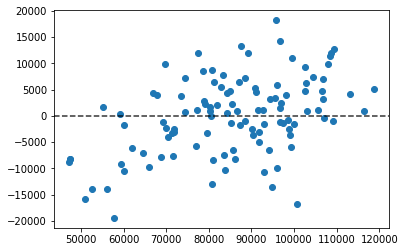

In [19]:
fig, ax = plt.subplots()
pred_y = reg_lin.predict(sm.add_constant(X))
ax.scatter(y, y - pred_y)
plt.axhline(y = 0, color = 'black', alpha = .8, linestyle = '--')

# Logistic_regression

In [20]:
df.columns

Index(['salario', 'noasiat', 'gpa', 'postgrad', 'experien'], dtype='object')

In [21]:
df.salario.describe()

count       110.000000
mean      85256.518182
std       16419.359283
min       47279.000000
25%       74379.000000
50%       86384.000000
75%       96827.250000
max      118683.000000
Name: salario, dtype: float64

In [46]:
y = np.where(df['salario'] > 96000, 1, 0)
X = df.drop('salario', axis = 'columns')


Text(0, 0.5, 'y')

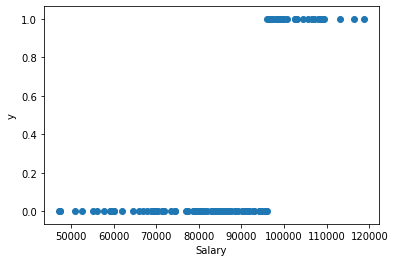

In [47]:
fig, ax = plt.subplots()
ax.scatter(df.salario, y)
ax.set_xlabel('Salary')
ax.set_ylabel('y')

In [37]:
log_reg = linear_model.LogisticRegression().fit(X,y)
stimated_y =log_reg.predict(X)

In [48]:
accuracy_score(y, log_reg.predict(X))

0.9090909090909091